# <p style="text-align:center;">Clustering des joueurs de football</p>

## Import des bibliothèques requises

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Création du Data Frame

In [31]:
df = pd.read_csv('Datas/X_Train_Data/train_away_player_statistics_df.csv')
df.describe()

,ID,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
count,236132.00000,207662.000000,207662.000000,207662.000000,232303.000000,206107.000000,206107.000000,206107.000000,24985.000000,207662.000000,...,228445.000000,179048.000000,204207.000000,204207.000000,204207.000000,228445.000000,66054.000000,0.0,0.0,0.0
mean,6151.37958,7.935477,22.728737,12.696791,9.282226,9.258642,7.177165,10.380671,34.673964,13.465478,...,32.590807,14.612869,21.640130,12.497872,27.032658,25.166745,2.099676,NaN,NaN,NaN
std,3551.66707,15.146502,20.894778,16.165656,16.387778,15.770194,14.581732,16.858181,35.226577,18.396448,...,36.436853,17.529688,19.341787,16.822583,19.397950,33.647951,11.139760,NaN,NaN,NaN
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,3079.00000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,NaN,NaN,NaN
50%,6150.00000,1.000000,18.000000,7.000000,0.000000,0.000000,0.000000,3.000000,21.000000,6.000000,...,0.000000,12.000000,19.000000,7.000000,26.000000,0.000000,0.000000,NaN,NaN,NaN
75%,9227.00000,9.000000,34.000000,18.000000,14.000000,14.000000,9.000000,14.000000,66.000000,18.000000,...,70.000000,23.000000,33.000000,19.000000,39.000000,63.000000,0.000000,NaN,NaN,NaN
max,12302.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN


## Nettoyage des données

In [32]:

df = df.select_dtypes(include=['number']) # On selectionne seulement les features numériques

df = df.dropna(axis=1, thresh=len(df)*0.5) # On ignore les colonne comportant plus de 50 pourcent de NaN

df = df.fillna(df.mean()) # On remplace toutes les valeurs NaN par la moyenne de la colonne 



## Standardisation des données.

In [33]:

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df) # On centre chaques features sur 0 avec écart-type 1. Elles sont donc centrées réduites.


## Méthode du coude afin d'évaluer le nombre de clusters adéquat

[64464036.00000006, 54430468.21766867, 50477312.555006474, 46102903.08148638, 44410646.99852131, 41937906.79926489, 41233756.57701677, 40275699.507030055, 39524003.253211096, 38843719.85993441, 38300308.01174799, 37610637.61238143, 37327935.22141968, 36587341.46933231]


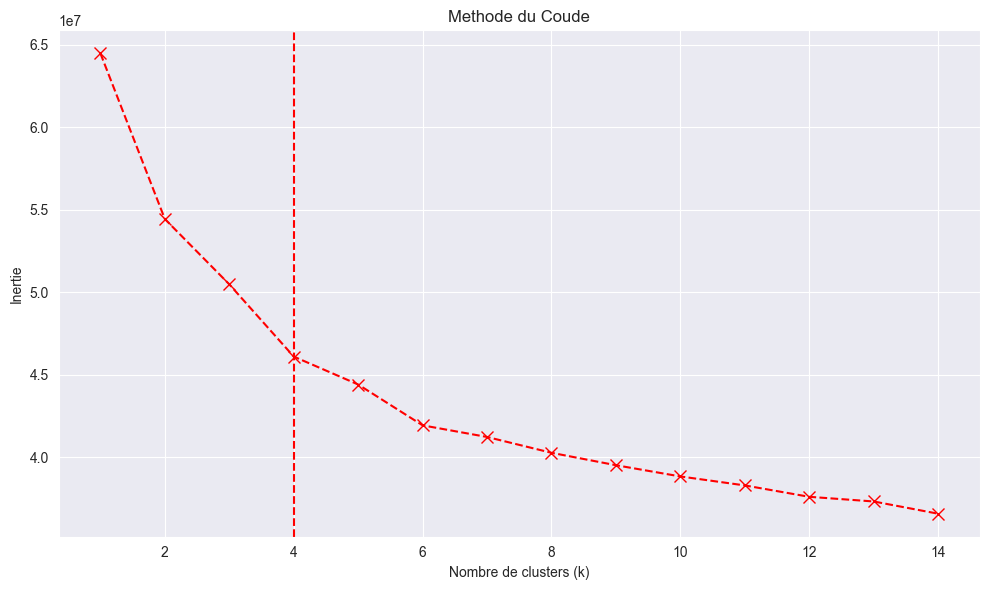

In [34]:




# Méthode du coude : déterminer le nombre optimal de clusters
K_range = range(1, 15) # Nous allons choisir le nombre de clusters idéal entre 1 et 14
inertia = [KMeans(n_clusters=k, random_state=54).fit(X_scaled).inertia_ for k in K_range] # On entraine le modèle Kmeans sur notre dataset standardisée et on relève l'inertie associée
print(inertia)

# On crée un modèle KMeans avec k clusters avec Kmeans
# On l'entraîne sur les données normalisées avec .fit VOIR 1 DE L'ANNEXE
# On ajoute l'inertie à la liste avec inertia


# Affichage du graphique
plt.figure(figsize=(10,6))
plt.plot(K_range, inertia, 'rx--', markersize=8) #croix rouge
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Methode du Coude')
plt.grid(True) # Pour avoir une grille
plt.tight_layout() # Sert a tous recenter
optimal_k = 4 # Afficher le choix que l'on a fait
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Nombre optimal de clusters: {optimal_k}')
plt.show()




## Clustering avec la méthode des K-Means

In [35]:

kmeans = KMeans(n_clusters=4, random_state=54)  # Crée une instance du modèle K-Means, avec comme paramètre 4 clusters et le générateur aléatoire 54
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters # Associe le cluster calculé par la méthode des K-Means à chaques lignes

C:\Users\tsl4297a\AppData\Local\Temp\ipykernel_8272\861294181.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



## Utilisation de PCA (Principal Componment Analysis) afin de pouvoir projeter le clustering en 2D
Ici nous utilisons le PCA afin de réduire notre clustering à deux features principales tout en concervant autant que possible la variance des données.

In [36]:
from sklearn.decomposition import PCA  
pca = PCA(n_components=2)
print(pca)
principal_components = pca.fit_transform(X_scaled)

PCA(n_components=2)


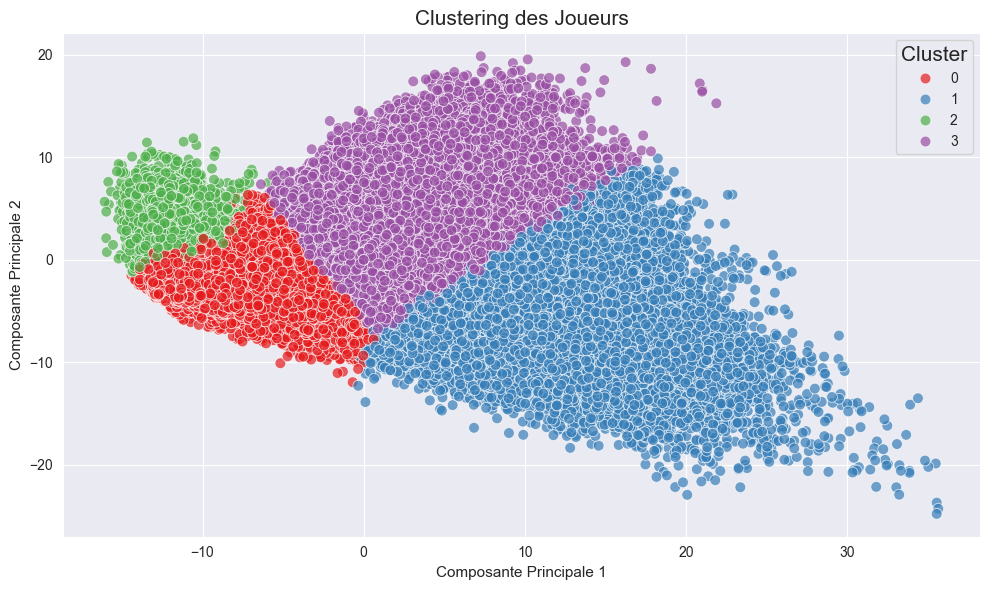

In [37]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")  # Utilise un style avec grille
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], 
                hue=clusters, palette='Set1', s=60, alpha=0.7)

plt.title('Clustering des Joueurs', fontsize=15)
plt.xlabel('Composante Principale 1', fontsize=11)
plt.ylabel('Composante Principale 2', fontsize=11)
plt.legend(title="Cluster", title_fontsize=15)
plt.tight_layout()
plt.show()


In [38]:
# Regrouper par cluster et prendre la moyenne
profiles = df.groupby('Cluster').mean()

# Afficher les stats moyennes pour chaque cluster
print(profiles)

# VOIR 3 DE L'ANNEXE

                  ID  PLAYER_ACCURATE_CROSSES_season_sum  \
Cluster                                                    
0        6167.874921                            1.816293   
1        6154.838039                           20.564016   
2        6151.456351                            0.005103   
3        6139.862091                            7.661583   

         PLAYER_ACCURATE_PASSES_season_sum  PLAYER_AERIALS_WON_season_sum  \
Cluster                                                                     
0                                 4.999396                       2.877452   
1                                28.114728                      17.806031   
2                                22.616093                       4.041644   
3                                31.631745                      17.652630   

         PLAYER_ASSISTS_season_sum  PLAYER_BIG_CHANCES_CREATED_season_sum  \
Cluster                                                                     
0                     

# ANNEXE

In [39]:
#1.
#inertia = []
#for k in K_range:
   # modele = KMeans(n_clusters=k, random_state=54) 
    #modele.fit(X_scaled)                           
    #inertia.append(modele.inertia_)  

#2.
# ajout colonne "Cluster" 
df.describe() #voir ce que ça apporte


#3.
# cluster 0 = attaquant/aillier : drible reussi 31 , beaucoup de chance cree 
# cluster 1 = millieu defensif/ lateral : beaoup de duel gagner et moyen dans tout
# cluster 2 = defenseur : carton jaune 43 , bonne passe beaucoup , degagemnet 35
# cluster 3 = gardien : save 50 , grosse chace 0 , asist 0




,ID,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,...,PLAYER_SHOTS_BLOCKED_5_last_match_std,PLAYER_SHOTS_ON_TARGET_5_last_match_std,PLAYER_SHOTS_TOTAL_5_last_match_std,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,Cluster
count,236132.00000,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000,...,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000,236132.000000
mean,6151.37958,7.935477,22.728737,12.696791,9.282226,9.258642,7.177165,10.380671,13.465478,2.641162,...,17.269692,14.394252,18.972562,32.590807,14.612869,21.640130,12.497872,27.032658,25.166745,1.705588
std,3551.66707,14.204087,19.594705,15.159829,16.254367,14.733498,13.623162,15.749963,17.251821,11.960491,...,18.089144,17.840047,17.728192,35.838864,15.264452,17.986818,15.644094,18.039046,33.095732,1.323006
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3079.00000,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,15.000000,0.000000,0.000000
50%,6150.00000,2.000000,22.000000,9.000000,0.000000,3.000000,0.000000,5.000000,9.000000,0.000000,...,17.269692,14.394252,18.972562,0.000000,14.612869,21.640130,9.000000,27.032658,0.000000,2.000000
75%,9227.00000,7.935477,31.000000,16.000000,14.000000,11.000000,7.177165,12.000000,15.000000,0.000000,...,25.000000,24.000000,27.000000,63.000000,17.000000,30.000000,16.000000,37.000000,63.000000,3.000000
max,12302.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3.000000


## Interprétation

In [44]:
# Regrouper par cluster et prendre la moyenne
profiles = df.groupby('Cluster').mean()

# Afficher les stats moyennes pour chaque cluster
print(profiles)

# VOIR 3 DE L'ANNEXE

                  ID  PLAYER_ACCURATE_CROSSES_season_sum  \
Cluster                                                    
0        6167.874921                            1.816293   
1        6154.838039                           20.564016   
2        6151.456351                            0.005103   
3        6139.862091                            7.661583   

         PLAYER_ACCURATE_PASSES_season_sum  PLAYER_AERIALS_WON_season_sum  \
Cluster                                                                     
0                                 4.999396                       2.877452   
1                                28.114728                      17.806031   
2                                22.616093                       4.041644   
3                                31.631745                      17.652630   

         PLAYER_ASSISTS_season_sum  PLAYER_BIG_CHANCES_CREATED_season_sum  \
Cluster                                                                     
0                     

,ID,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,...,PLAYER_SAVES_INSIDE_BOX_5_last_match_std,PLAYER_SHOTS_BLOCKED_5_last_match_std,PLAYER_SHOTS_ON_TARGET_5_last_match_std,PLAYER_SHOTS_TOTAL_5_last_match_std,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,6153.507851,7.511749,21.840490,10.594439,9.182084,9.239260,7.485412,6.658205,11.259118,1.690909,...,12.891991,14.225650,13.692470,16.948942,27.507274,13.361958,16.604175,10.868862,22.422274,21.940852
std,11.526744,9.294660,11.824533,8.252598,11.524639,11.757103,10.258347,7.972851,8.166731,2.061793,...,24.719961,13.767849,15.934114,17.235237,11.125164,11.650293,13.638789,10.668517,15.089935,12.619214
min,6139.862091,0.005103,4.999396,2.877452,0.465555,0.544527,0.081098,0.051042,2.760081,0.011552,...,0.010210,0.091311,0.140415,0.229778,12.685243,2.586600,1.454493,0.036492,4.889146,9.594932
25%,6148.557786,1.363495,18.211918,3.750596,1.915591,1.803193,1.726935,1.678688,6.985308,0.366467,...,0.564064,4.241365,4.078120,6.187493,22.674169,5.683077,6.983513,4.053705,12.461334,11.802403
50%,6153.147195,4.738938,25.365410,10.847137,5.244697,5.097607,3.644040,4.320403,10.043906,1.074797,...,0.795009,13.474197,9.192173,13.815893,29.418554,10.945636,17.639909,9.443401,23.906494,22.452240
75%,6158.097260,10.887191,28.993982,17.690980,12.511190,12.533675,9.402517,9.299920,14.317716,2.399239,...,13.122937,23.458482,18.806523,24.577342,34.251659,18.624517,27.260572,16.258557,33.867434,32.590689
max,6167.874921,20.564016,31.631745,17.806031,25.773385,26.217300,22.572471,17.940972,22.188579,4.602487,...,49.967736,29.862894,36.245117,39.934204,38.506744,28.969963,29.682388,24.552155,36.986960,33.263997


In [45]:
import plotly.express as px


# Préparer le DataFrame
df_plot = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'Cluster': clusters
})

# Associer les clusters à des noms clairs
df_plot['Profil'] = df_plot['Cluster'].map({
    0: 'Attaquants',
    1: 'Milieux',
    2: 'Défenseurs',
    3: 'Gardiens'
})

# Faire le scatter plot
fig = px.scatter(
    df_plot, x='PC1', y='PC2',
    color='Profil',
    color_discrete_sequence=px.colors.qualitative.Set1,
    title='Clustering des Joueurs',
    labels={'PC1': 'Composante Principale 1', 'PC2': 'Composante Principale 2'},
    opacity=0.8
)

fig.update_layout(legend_title_text='Profil de Joueur')
fig.show()





ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

#### Notre objectif est de déduire quel cluster correspond à quel poste :

Attaquant

Milieu de terrain

Défenseur

Gardien de but

<span style="color: red;">Cluster 0</span>

Passes réussies : Très faible 

Dégagements (Clearances) : 2.7 assez faible

Arrêts dans la surface (Saves inside box) : 0.84 -> relativement 

Dribbles réussis : 6.7 -> correct

Tirs cadrés : 5.39

Duel total : 14.98

Jaunes : 9.59

C'est un profil plutot milieu defensif / lateral

<span style="color: blue;">Cluster 1</span>

Passes réussies : 28 -> élevé

Tacles : 26

Duel total : 37

Tirs cadrés : 36

Dribbles : 29

Jaunes : 32

Très actif offensivement.
C'est un attaquant / aillier

<span style="color: green;">Cluster 2</span>

Passes réussies : 22

Arrêts dans la surface : 50 

Tirs : très bas

Dégagements : modérés

Tacles : 1.4 -> très peu

Jaunes : 12

50 arrêts par match.
Gardien de but.

<span style="color: violet;">Cluster 3</span>

Passes réussies : 31

Tacles : 29

Duel total : 32

Tirs : 19 (moins que Cluster 1)

Très engagé défensivement.

Cela ressemble clairement à un défenseur.
